In [1]:
# !pip install fastai==0.7 --no-deps
# !pip install torch==0.4.1 torchvision==0.2.1
import fastai
from fastai.vision import *
from fastai.collab import *
from fastai.tabular import *
fastai.__version__

'1.0.52.dev0'

In [2]:
path = '../working'
!ls {path}

__notebook_source__.ipynb


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# from fastai.collab import *
# from fastai.tabular import *
from fastai.imports import *
#from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import itertools
from sklearn.metrics import *
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.imports import *
# Any results you write to the current directory are saved as output.

['test_bqCt9Pv.csv', 'sample_submission_24jSKY6.csv', 'train.csv']


In [4]:
PATH = "../input"
!ls {PATH}

sample_submission_24jSKY6.csv  test_bqCt9Pv.csv  train.csv


In [5]:
path = '../working'
!ls {path}

__notebook_source__.ipynb


In [6]:
# reading the data

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test_bqCt9Pv.csv')

# getting the shapes of the datasets
print("Shape of Train :", train.shape)
print("Shape of Test :", test.shape)

Shape of Train : (233154, 41)
Shape of Test : (112392, 40)


In [7]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

In [8]:
# lets look at the head of the train

train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [9]:
# lets look at the head of the test data

test.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,03-11-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,20-11-18,6,1998,1,1,0,0,0,0,749,C-Very Low Risk,2,1,0,43898,48780,48780,0,0,0,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,29-11-18,4,1646,1,1,1,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,29-11-18,4,1646,1,1,0,0,0,0,14,Not Scored: Only a Guarantor,1,1,1,132480,255000,255000,0,0,0,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,17-11-18,4,1646,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [10]:
# let's decsribe the train set

train.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [11]:
# let's describe the test set

test.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
count,112392.000000,112392.000000,1.123920e+05,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,112392.0,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,112392.00000,112392.000000,112392.000000,1.123920e+05,1.123920e+05,1.123920e+05,112392.000000,112392.000000,112392.000000,1.123920e+05,1.123920e+05,1.123920e+05,1.123920e+05,1.123920e+05,112392.000000,112392.000000,112392.000000
mean,711741.891861,56076.803269,7.718639e+04,75.310325,78.902591,19843.303545,68.366031,3014.001352,7.215754,1771.651541,1.0,0.869626,0.191588,0.120978,0.016709,0.001913,288.138106,2.22716,0.928260,0.152235,1.485912e+05,1.912856e+05,1.919172e+05,0.023560,0.012350,0.003176,2.776081e+03,3.721477e+03,3.671156e+03,1.123698e+04,1.679060e+02,0.314907,0.091884,0.226119
std,33492.215991,13123.697627,1.827149e+04,11.006380,71.469633,3555.303301,22.137265,2223.215364,4.679847,1104.533635,0.0,0.336716,0.393553,0.326104,0.128181,0.043696,339.806585,4.55903,1.733452,0.531832,8.890925e+05,1.069343e+06,1.077010e+06,0.393237,0.198374,0.073784,1.406059e+05,2.015516e+05,2.013686e+05,2.741250e+05,1.763841e+04,0.843406,0.381809,0.739231
min,654115.000000,11613.000000,4.011700e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-2.012765e+06,-4.815000e+05,0.000000e+00,0.000000,0.000000,0.000000,-3.882000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,682658.750000,48849.000000,6.751000e+04,69.970000,15.000000,16633.000000,45.000000,1312.000000,4.000000,801.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,711522.500000,55359.000000,7.258400e+04,77.780000,67.000000,20675.000000,86.000000,2412.000000,6.000000,1664.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
75%,740851.250000,62147.000000,8.004000e+04,83.740000,136.000000,23170.000000,86.000000,5092.000000,10.000000,2694.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,679.000000,2.00000,1.000000,0.000000,2.472500e+04,5.100000e+04,5.000000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.855000e+03,0.000000e+00,0.000000,0.000000,0.000000
max,769909.000000,940690.000000,1.271553e+06,95.000000,261.000000,24901.000000,155.000000,7345.000000,22.000000,3923.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,879.000000,130.00000,38.000000,22.000000,6.714607e+07,8.367934e+07,8.367934e+07,57.000000,20.000000,8.000000,3.579410e+07,5.794500e+07,5.794500e+07,8.526233e+07,5.390000e+06,22.000000,18.000000,23.000000


In [12]:
# get the info of train

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [13]:
# get the info of test set

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 0 to 112391
Data columns (total 40 columns):
UniqueID                               112392 non-null int64
disbursed_amount                       112392 non-null int64
asset_cost                             112392 non-null int64
ltv                                    112392 non-null float64
branch_id                              112392 non-null int64
supplier_id                            112392 non-null int64
manufacturer_id                        112392 non-null int64
Current_pincode_ID                     112392 non-null int64
Date.of.Birth                          112392 non-null object
Employment.Type                        108949 non-null object
DisbursalDate                          112392 non-null object
State_ID                               112392 non-null int64
Employee_code_ID                       112392 non-null int64
MobileNo_Avl_Flag                      112392 non-null int64
Aadhar_flag                   

In [14]:
# getting the data types of train

train.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [15]:
# getting the data types of test

test.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [16]:
# checking if there exists any NULL values in the train set

train.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [17]:
# checking if there exists any NULL values in the test set

test.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [18]:
# checking the values present in the Employement.Type attribute in the train and test sets

train['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [19]:
# filling the missing values in the Employment.Type attribute of train and test sets

# Employement Type has two types of Employment i.e., self employed and salaried
# but the empty values must be the people who don't  work at all that's why it is empty
# let's fill unemployed in the place of Null values

train['Employment.Type'].fillna('Unemployed', inplace = True)
test['Employment.Type'].fillna('Unemployed', inplace = True)

# let's check if there is any null values still left or not
print("Null values left in the train set:", train.isnull().sum().sum())
print("Null values left in the test set:", test.isnull().sum().sum())

Null values left in the train set: 0
Null values left in the test set: 0


In [20]:
# let's save the unique id of the test set and labels set

unique_id = test['UniqueID']
y = train['loan_default']

# let's delete the last column from the dataset to  concat train and test
train = train.drop(['loan_default'], axis = 1)

# shape of train
train.shape, test.shape,y.shape

((233154, 40), (112392, 40), (233154,))

In [21]:
# lets concat the train and test sets for preprocessing and visualizations

data = pd.concat([train, test], axis = 0,ignore_index=True)

# let's check the shape
data.shape


(345546, 40)

In [22]:
# let's check the employement type in the data
data['Employment.Type'].value_counts()
#train['Employment.Type'].value_counts(), test['Employment.Type'].value_counts()

Self employed    187429
Salaried         147013
Unemployed        11104
Name: Employment.Type, dtype: int64

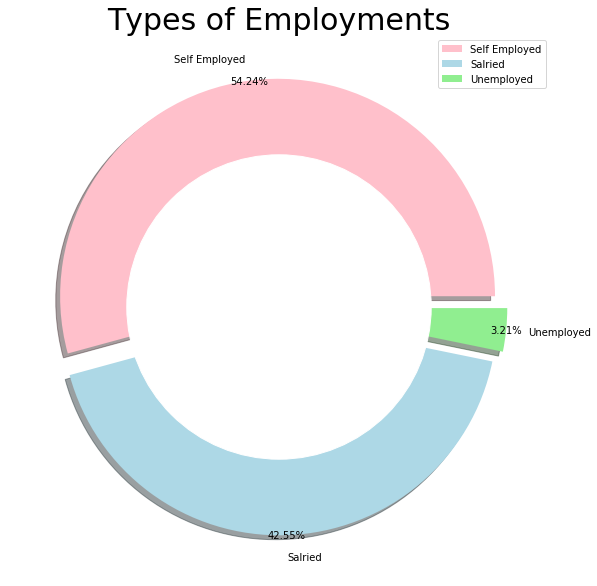

In [23]:
# plotting a donut chart

size = [187429, 147013, 11104]
colors = ['pink', 'lightblue', 'lightgreen']
labels = "Self Employed", "Salried", "Unemployed" 
explode = [0.05, 0.05, 0.05]

circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, pctdistance = 1, autopct = '%.2f%%')
plt.title('Types of Employments', fontsize = 30)
plt.axis('off')
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.show()

In [24]:
# encodings for type of employments

data['Employment.Type'] = data['Employment.Type'].replace(('Self employed', 'Salaried', 'Unemployed'), (2, 1, 0))
train['Employment.Type'] = train['Employment.Type'].replace(('Self employed', 'Salaried', 'Unemployed'), (2, 1, 0))
test['Employment.Type'] = test['Employment.Type'].replace(('Self employed', 'Salaried', 'Unemployed'), (2, 1, 0))

# checking the values  of employement type
data['Employment.Type'].value_counts()

2    187429
1    147013
0     11104
Name: Employment.Type, dtype: int64

In [25]:
# checking the columns names of the data

data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES'],
      dtype='object')

In [26]:
#let's check the unique values of ids in different branchs

print("Total no. of Unique Ids :", data['UniqueID'].nunique())
print("Total no. of Unique Branches :", data['branch_id'].nunique())
print("Total no. of Unique Suppliers :", data['supplier_id'].nunique())
print("Total no. of Unique Manufactures :", data['manufacturer_id'].nunique())
print("Total no. of Unique Current pincode Ids :", data['Current_pincode_ID'].nunique())
print("Total no. of Unique State IDs :",data['State_ID'].nunique())
print("Total no. of Unique Employee code IDs :", data['Employee_code_ID'].nunique())

Total no. of Unique Ids : 345546
Total no. of Unique Branches : 82
Total no. of Unique Suppliers : 3089
Total no. of Unique Manufactures : 12
Total no. of Unique Current pincode Ids : 7096
Total no. of Unique State IDs : 22
Total no. of Unique Employee code IDs : 3398


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


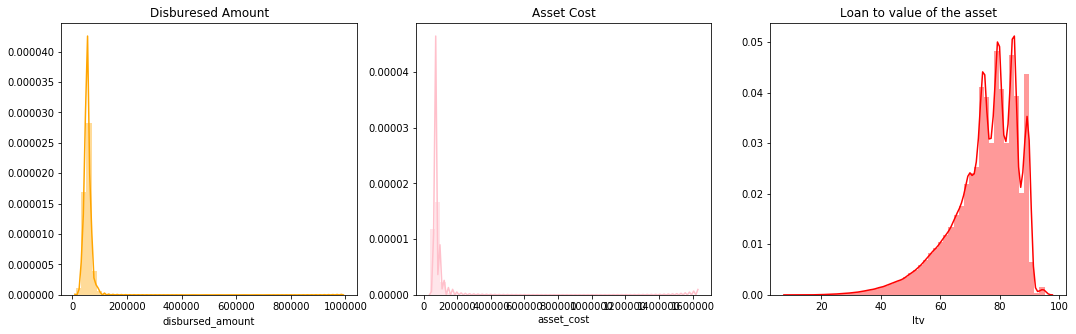

In [27]:
# check the distribution of disbursed amount

plt.rcParams['figure.figsize'] = (18, 5)

plt.subplot(1, 3, 1)
sns.distplot(data['disbursed_amount'],  color = 'orange')
plt.title('Disburesed Amount')

plt.subplot(1, 3, 2)
sns.distplot(data['asset_cost'], color = 'pink')
plt.title('Asset Cost')

plt.subplot(1, 3, 3)
sns.distplot(data['ltv'], color = 'red')
plt.title('Loan to value of the asset')

plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


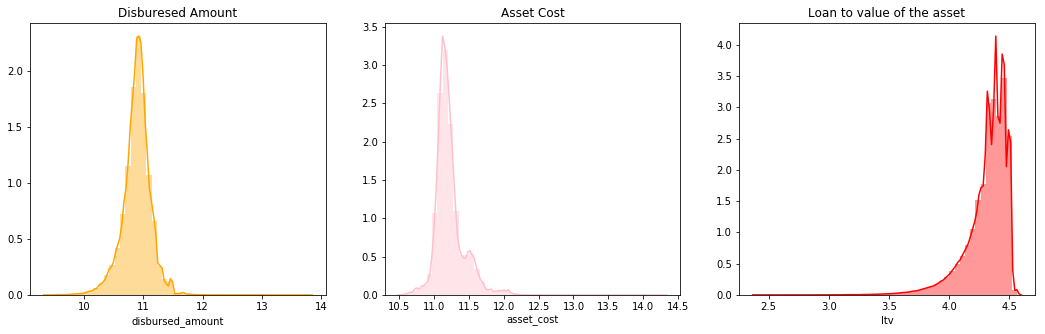

In [28]:
#performing log transformations on disbursed amount, ltv, and asset cost

data['disbursed_amount'] = np.log1p(data['disbursed_amount'])
data['ltv'] = np.log1p(data['ltv'])
data['asset_cost'] = np.log1p(data['asset_cost'])

train['disbursed_amount'] = np.log1p(train['disbursed_amount'])
train['ltv'] = np.log1p(train['ltv'])
train['asset_cost'] = np.log1p(train['asset_cost'])

test['disbursed_amount'] = np.log1p(test['disbursed_amount'])
test['ltv'] = np.log1p(test['ltv'])
test['asset_cost'] = np.log1p(test['asset_cost'])

plt.rcParams['figure.figsize'] = (18, 5)

plt.subplot(1, 3, 1)
sns.distplot(data['disbursed_amount'],  color = 'orange')
plt.title('Disburesed Amount')

plt.subplot(1, 3, 2)
sns.distplot(data['asset_cost'], color = 'pink')
plt.title('Asset Cost')

plt.subplot(1, 3, 3)
sns.distplot(data['ltv'], color = 'red')
plt.title('Loan to value of the asset')

plt.show()

In [29]:
# date of birth is an useless attribute 
#  the only thing we can extract the is the year of birth
# let's first convert the date into date-time format

data['Date.of.Birth'] = pd.to_datetime(data['Date.of.Birth'], errors = 'coerce')
train['Date.of.Birth'] = pd.to_datetime(train['Date.of.Birth'], errors = 'coerce')
test['Date.of.Birth'] = pd.to_datetime(test['Date.of.Birth'], errors = 'coerce')

# extracting the year of birth of the customers
data['Year_of_birth'] = data['Date.of.Birth'].dt.year
train['Year_of_birth'] = train['Date.of.Birth'].dt.year
test['Year_of_birth'] = test['Date.of.Birth'].dt.year
data['Year_of_birth'].min(), data['Year_of_birth'].max()

(1969, 2068)

In [30]:
##assuming we don't have enough histroy to secure a loan till age of 18 i.e. max year should be 2001.we will cap this year
data.loc[data['Date.of.Birth'].dt.year >2001,'Date.of.Birth'] = pd.to_datetime(20010101,format='%Y%m%d')
train.loc[train['Date.of.Birth'].dt.year >2001,'Date.of.Birth'] = pd.to_datetime(20010101,format='%Y%m%d')
test.loc[train['Date.of.Birth'].dt.year >2001,'Date.of.Birth'] = pd.to_datetime(20010101,format='%Y%m%d')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution by age')

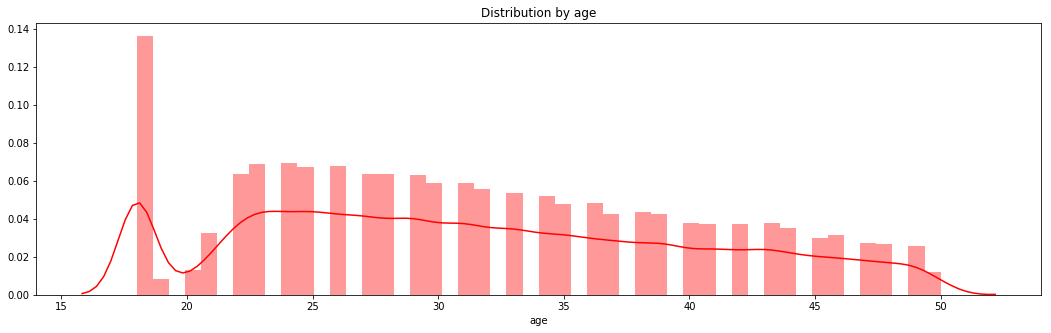

In [31]:
import datetime as DT
now = pd.Timestamp(DT.datetime.now())
data['age'] = (now - data['Date.of.Birth']).astype('<m8[Y]') 
data['Year_of_birth'] = data['Date.of.Birth'].dt.year

train['age'] = (now - train['Date.of.Birth']).astype('<m8[Y]') 
train['Year_of_birth'] = train['Date.of.Birth'].dt.year

test['age'] = (now - test['Date.of.Birth']).astype('<m8[Y]') 
test['Year_of_birth'] = test['Date.of.Birth'].dt.year
sns.distplot(data['age'],color='red')
plt.title('Distribution by age')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Year of birth')

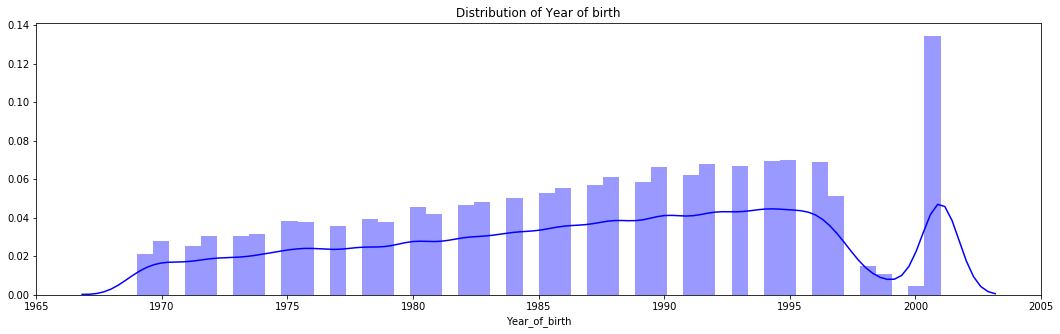

In [32]:
# checking the values inside date of year
sns.distplot(data['Year_of_birth'], color = 'blue')
plt.title('Distribution of Year of birth')

Text(0.5, 1.0, 'No. of Inquiries')

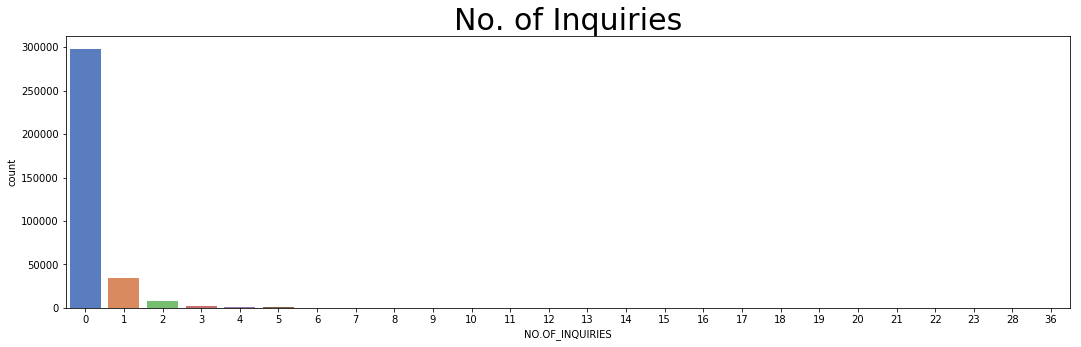

In [33]:
# plotting a countplot

sns.countplot(data['NO.OF_INQUIRIES'], palette = 'muted')
plt.title('No. of Inquiries',  fontsize = 30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
        28]), <a list of 29 Text xticklabel objects>)

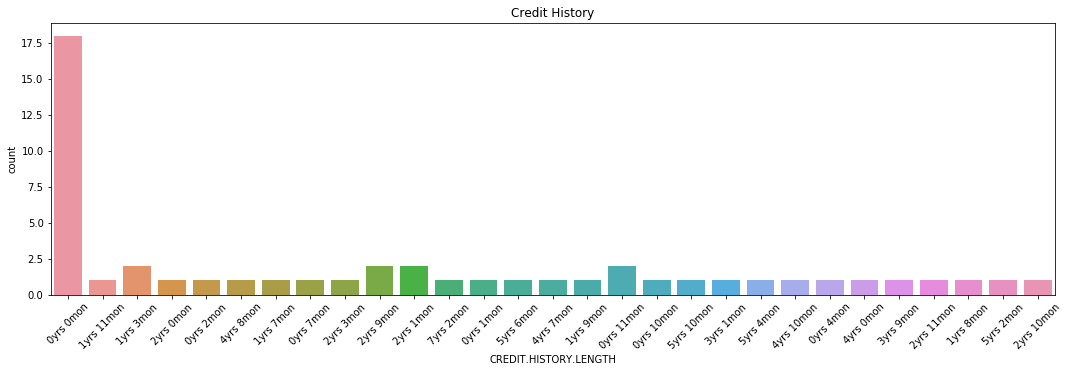

In [34]:
# # plotting countplot for credit history of users
plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(data['CREDIT.HISTORY.LENGTH'].head(50))
plt.title('Credit History')
plt.xticks(rotation = 45)

In [35]:
##convert string formatted year.month columns to number of months
def convert__int(column):
    months=[i for i in range(len(column))]
    for j in range(len(column)):
        months[j] = int(re.findall(r'\d+', column[j])[0]) *12 + int(re.findall(r'\d+', column[j])[1])
        #column[i] = months[i]
    return months

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]),
 <a list of 22 Text xticklabel objects>)

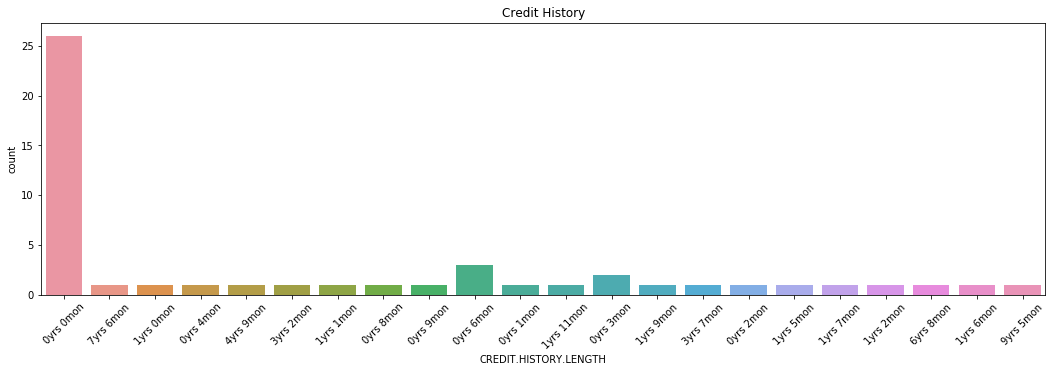

In [36]:
# # plotting countplot for credit history of users
plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(data['CREDIT.HISTORY.LENGTH'].tail(50))
plt.title('Credit History')
plt.xticks(rotation = 45)

In [37]:
# changing the credit history format from ayrsbmonths to number of months 
data['AVERAGE.ACCT.AGE'] = convert__int(data['AVERAGE.ACCT.AGE'])
data['CREDIT.HISTORY.LENGTH'] = convert__int(data['CREDIT.HISTORY.LENGTH'])

train['AVERAGE.ACCT.AGE'] = convert__int(train['AVERAGE.ACCT.AGE'])
train['CREDIT.HISTORY.LENGTH'] = convert__int(train['CREDIT.HISTORY.LENGTH'])

test['AVERAGE.ACCT.AGE'] = convert__int(test['AVERAGE.ACCT.AGE'])
test['CREDIT.HISTORY.LENGTH'] = convert__int(test['CREDIT.HISTORY.LENGTH'])
# data['CREDIT.HISTORY.LENGTH'] = data['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0])
# data['CREDIT.HISTORY.LENGTH'] = data['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split('yrs')[0])
#data['CREDIT.HISTORY.LENGTH'].value_counts()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


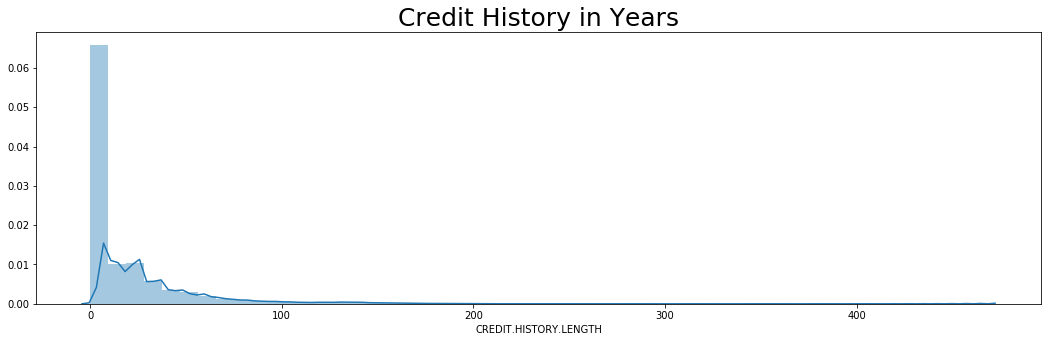

In [38]:
# distribution of credit history years

plt.rcParams['figure.figsize'] = (18, 5)
sns.distplot(data['CREDIT.HISTORY.LENGTH'])
plt.title('Credit History in Years', fontsize = 25)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([-40., -20.,   0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 8 Text xticklabel objects>)

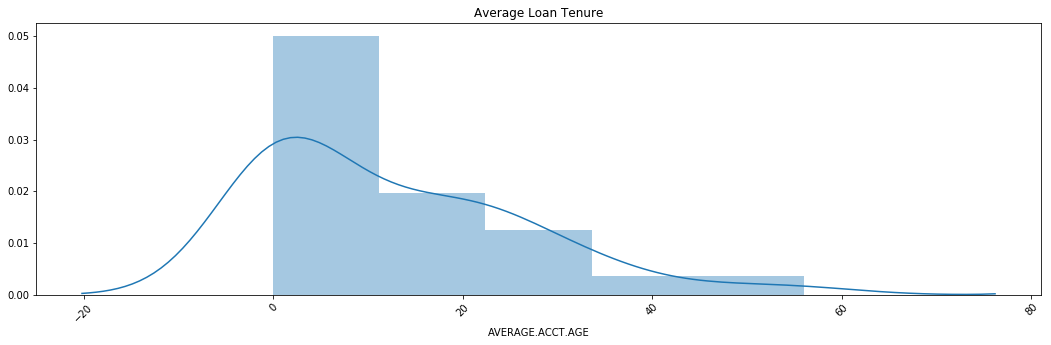

In [39]:
# average.acct.age i.e., average loan tenure

sns.distplot(data['AVERAGE.ACCT.AGE'].head(50))
plt.title('Average Loan Tenure')
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

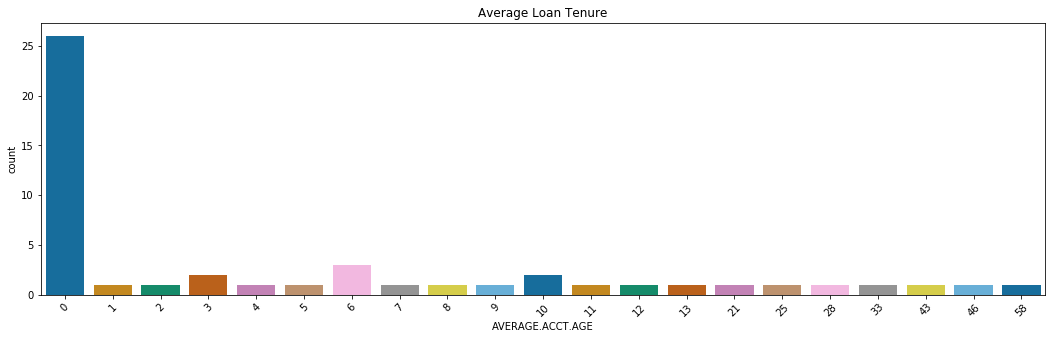

In [40]:
# average.acct.age i.e., average loan tenure

sns.countplot(data['AVERAGE.ACCT.AGE'].tail(50), palette = 'colorblind')
plt.title('Average Loan Tenure')
plt.xticks(rotation = 45)

In [41]:
# changing the average account age format from ayrsbmonths to years 
# as no. of years are more important

# data['AVERAGE.ACCT.AGE'] = data['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0])
# data['AVERAGE.ACCT.AGE'] = data['AVERAGE.ACCT.AGE'].apply(lambda x: x.split('yrs')[0])
#data['AVERAGE.ACCT.AGE'].value_counts()

In [42]:
# loans defaulted in last six months

data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     319144
1      21684
2       3550
3        790
4        220
5         78
6         29
7         21
8         10
9          7
12         5
11         3
10         2
20         1
18         1
16         1
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [43]:
# new loans taken by the customer before disbursement

data['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     272341
1      45965
2      15618
3       6161
4       2636
5       1287
6        625
7        383
8        197
9        109
10        82
11        47
12        28
13        18
14        11
17         9
16         8
15         4
19         4
20         4
18         2
22         2
23         2
28         1
21         1
35         1
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


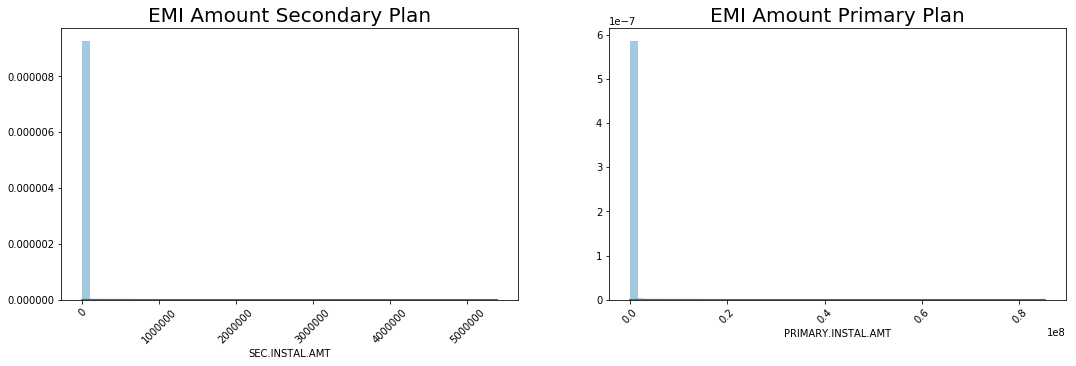

In [44]:
# EMI Amount of the Secondary Plan

plt.subplot(1, 2, 1)
sns.distplot(data['SEC.INSTAL.AMT'])
plt.title('EMI Amount Secondary Plan', fontsize = 20)
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
sns.distplot(data['PRIMARY.INSTAL.AMT'])
plt.title('EMI Amount Primary Plan', fontsize = 20)
plt.xticks(rotation = 45)

plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


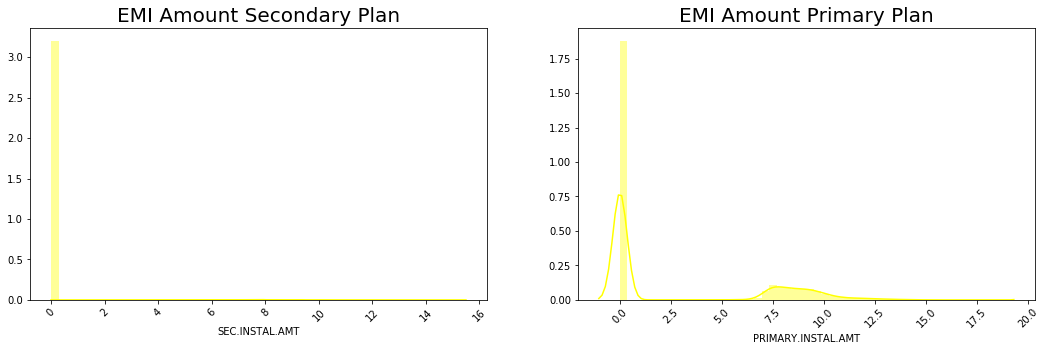

In [45]:
# let's apply log transformations on EMI Amount of the Primary Loan and Secondary loan

data['PRIMARY.INSTAL.AMT'] = np.log1p(data['PRIMARY.INSTAL.AMT'])
data['SEC.INSTAL.AMT'] = np.log1p(data['SEC.INSTAL.AMT'])

train['PRIMARY.INSTAL.AMT'] = np.log1p(train['PRIMARY.INSTAL.AMT'])
train['SEC.INSTAL.AMT'] = np.log1p(train['SEC.INSTAL.AMT'])

test['PRIMARY.INSTAL.AMT'] = np.log1p(test['PRIMARY.INSTAL.AMT'])
test['SEC.INSTAL.AMT'] = np.log1p(test['SEC.INSTAL.AMT'])

plt.subplot(1, 2, 1)
sns.distplot(data['SEC.INSTAL.AMT'], color = 'yellow')
plt.title('EMI Amount Secondary Plan', fontsize = 20)
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
sns.distplot(data['PRIMARY.INSTAL.AMT'],color = 'yellow')
plt.title('EMI Amount Primary Plan', fontsize = 20)
plt.xticks(rotation = 45)

plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([-10000000.,         0.,  10000000.,  20000000.,  30000000.,  40000000.,  50000000.,  60000000.,  70000000.]),
 <a list of 9 Text xticklabel objects>)

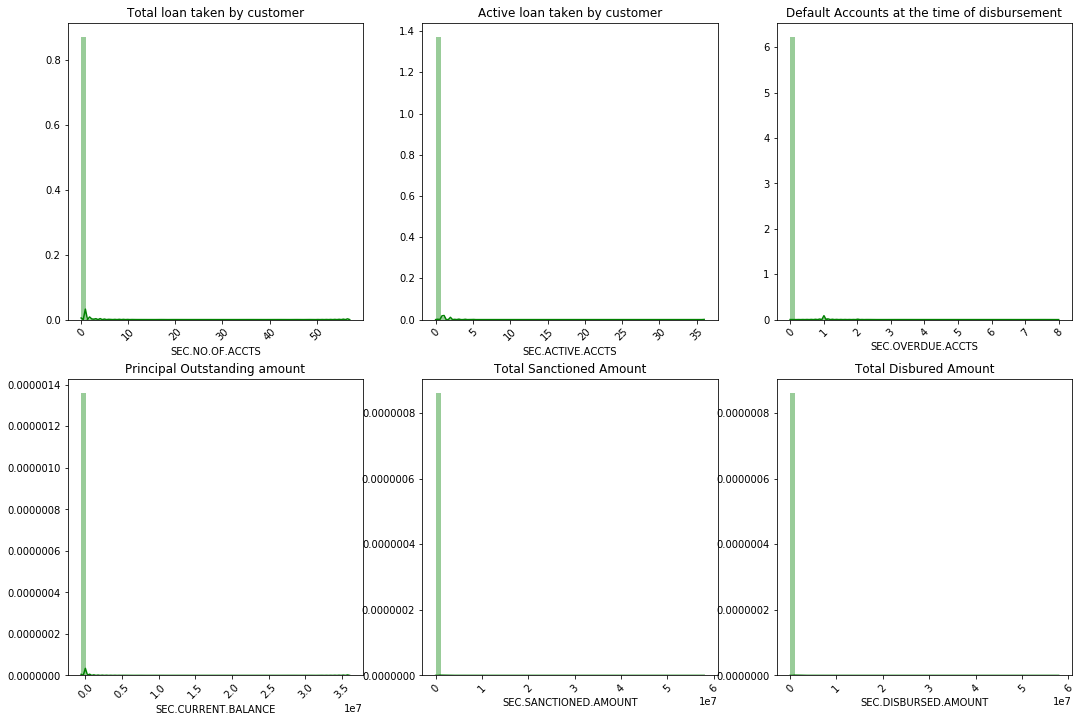

In [46]:
# distribution for different attributesof secondary accounts


plt.rcParams['figure.figsize'] = (18, 12)    
plt.subplot(2, 3, 1)
sns.distplot(data['SEC.NO.OF.ACCTS'], color = 'green')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sns.distplot(data['SEC.ACTIVE.ACCTS'], color = 'green')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sns.distplot(data['SEC.OVERDUE.ACCTS'], color = 'green')
plt.title('Default Accounts at the time of disbursement')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 4)
sns.distplot(data['SEC.CURRENT.BALANCE'], color = 'green')
plt.title('Principal Outstanding amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sns.distplot(data['SEC.SANCTIONED.AMOUNT'], color = 'green')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sns.distplot(data['SEC.DISBURSED.AMOUNT'], color = 'green')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

In [47]:
# applying log transformation to all these attributes

data['SEC.NO.OF.ACCTS'] = np.log1p(data['SEC.NO.OF.ACCTS'])
data['SEC.ACTIVE.ACCTS'] = np.log1p(data['SEC.ACTIVE.ACCTS'])
data['SEC.OVERDUE.ACCTS'] = np.log1p(data['SEC.OVERDUE.ACCTS'])
#data['SEC.CURRENT.BALANCE'] = np.log1p(data['SEC.CURRENT.BALANCE'])
data['SEC.SANCTIONED.AMOUNT'] = np.log1p(data['SEC.SANCTIONED.AMOUNT'])
data['SEC.DISBURSED.AMOUNT'] = np.log1p(data['SEC.DISBURSED.AMOUNT'])

#  filling  missing values in sec.current.balance
data['SEC.CURRENT.BALANCE'].fillna(data['SEC.CURRENT.BALANCE'].mean(), inplace = True)


In [48]:
train['SEC.NO.OF.ACCTS'] = np.log1p(train['SEC.NO.OF.ACCTS'])
train['SEC.ACTIVE.ACCTS'] = np.log1p(train['SEC.ACTIVE.ACCTS'])
train['SEC.OVERDUE.ACCTS'] = np.log1p(train['SEC.OVERDUE.ACCTS'])
#train['SEC.CURRENT.BALANCE'] = np.log1p(train['SEC.CURRENT.BALANCE'])
train['SEC.SANCTIONED.AMOUNT'] = np.log1p(train['SEC.SANCTIONED.AMOUNT'])
train['SEC.DISBURSED.AMOUNT'] = np.log1p(train['SEC.DISBURSED.AMOUNT'])

#  filling  missing values in sec.current.balance
train['SEC.CURRENT.BALANCE'].fillna(train['SEC.CURRENT.BALANCE'].mean(), inplace = True)

In [49]:
test['SEC.NO.OF.ACCTS'] = np.log1p(test['SEC.NO.OF.ACCTS'])
test['SEC.ACTIVE.ACCTS'] = np.log1p(test['SEC.ACTIVE.ACCTS'])
test['SEC.OVERDUE.ACCTS'] = np.log1p(test['SEC.OVERDUE.ACCTS'])
#test['SEC.CURRENT.BALANCE'] = np.log1p(test['SEC.CURRENT.BALANCE'])
test['SEC.SANCTIONED.AMOUNT'] = np.log1p(test['SEC.SANCTIONED.AMOUNT'])
test['SEC.DISBURSED.AMOUNT'] = np.log1p(test['SEC.DISBURSED.AMOUNT'])

#  filling  missing values in sec.current.balance
test['SEC.CURRENT.BALANCE'].fillna(test['SEC.CURRENT.BALANCE'].mean(), inplace = True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


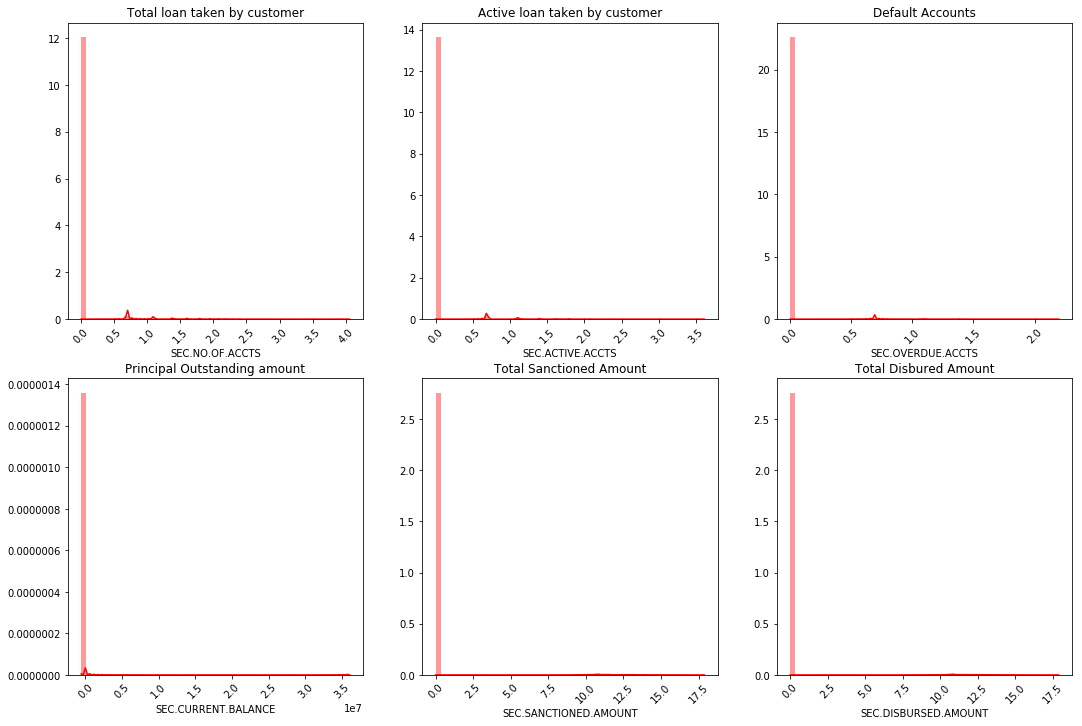

In [50]:

plt.rcParams['figure.figsize'] = (18, 12)    
plt.subplot(2, 3, 1)
sns.distplot(data['SEC.NO.OF.ACCTS'], color = 'red')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sns.distplot(data['SEC.ACTIVE.ACCTS'], color = 'red')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sns.distplot(data['SEC.OVERDUE.ACCTS'], color = 'red')
plt.title('Default Accounts')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 4)
sns.distplot(data['SEC.CURRENT.BALANCE'], color = 'red')
plt.title('Principal Outstanding amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sns.distplot(data['SEC.SANCTIONED.AMOUNT'], color = 'red')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sns.distplot(data['SEC.DISBURSED.AMOUNT'], color = 'red')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

plt.show()

In [51]:
#  applying log transformations to the primary account attributes

data['PRI.NO.OF.ACCTS'] = np.log1p(data['PRI.NO.OF.ACCTS'])
data['PRI.ACTIVE.ACCTS'] = np.log1p(data['PRI.ACTIVE.ACCTS'])
#data['PRI.OVERDUE.ACCTS'] = np.log1p(data['PRI.OVERDUE.ACCTS'])
#data['PRI.CURRENT.BALANCE'] = np.log1p(data['PRI.CURRENT.BALANCE'])
data['PRI.SANCTIONED.AMOUNT'] = np.log1p(data['PRI.SANCTIONED.AMOUNT'])
data['PRI.DISBURSED.AMOUNT'] = np.log1p(data['PRI.DISBURSED.AMOUNT'])

#  filling  missing values in sec.current.balance
data['PRI.CURRENT.BALANCE'].fillna(data['PRI.CURRENT.BALANCE'].mean(), inplace = True)
data['PRI.SANCTIONED.AMOUNT'].fillna(data['PRI.SANCTIONED.AMOUNT'].mean(), inplace = True)
data['PRI.OVERDUE.ACCTS'].fillna(data['PRI.OVERDUE.ACCTS'].mean(), inplace = True)
data['PRI.DISBURSED.AMOUNT'].fillna(data['PRI.DISBURSED.AMOUNT'].mean(), inplace = True)
#data['PRI.OVERDUE.ACCTS'].fillna(data['PRI.OVERDUE.ACCTS'].mean(), inplace = True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log1p
  import sys


In [52]:
#  applying log transformations to the primary account attributes

train['PRI.NO.OF.ACCTS'] = np.log1p(train['PRI.NO.OF.ACCTS'])
train['PRI.ACTIVE.ACCTS'] = np.log1p(train['PRI.ACTIVE.ACCTS'])
#data['PRI.OVERDUE.ACCTS'] = np.log1p(train['PRI.OVERDUE.ACCTS'])
#train['PRI.CURRENT.BALANCE'] = np.log1p(train['PRI.CURRENT.BALANCE'])
train['PRI.SANCTIONED.AMOUNT'] = np.log1p(train['PRI.SANCTIONED.AMOUNT'])
train['PRI.DISBURSED.AMOUNT'] = np.log1p(train['PRI.DISBURSED.AMOUNT'])

#  filling  missing values in sec.current.balance
train['PRI.CURRENT.BALANCE'].fillna(train['PRI.CURRENT.BALANCE'].mean(), inplace = True)
train['PRI.SANCTIONED.AMOUNT'].fillna(train['PRI.SANCTIONED.AMOUNT'].mean(), inplace = True)
train['PRI.OVERDUE.ACCTS'].fillna(train['PRI.OVERDUE.ACCTS'].mean(), inplace = True)
train['PRI.DISBURSED.AMOUNT'].fillna(train['PRI.DISBURSED.AMOUNT'].mean(), inplace = True)

In [53]:
#  applying log transformations to the primary account attributes

test['PRI.NO.OF.ACCTS'] = np.log1p(test['PRI.NO.OF.ACCTS'])
test['PRI.ACTIVE.ACCTS'] = np.log1p(test['PRI.ACTIVE.ACCTS'])
#test['PRI.OVERDUE.ACCTS'] = np.log1p(test['PRI.OVERDUE.ACCTS'])
#test['PRI.CURRENT.BALANCE'] = np.log1p(test['PRI.CURRENT.BALANCE'])
test['PRI.SANCTIONED.AMOUNT'] = np.log1p(test['PRI.SANCTIONED.AMOUNT'])
test['PRI.DISBURSED.AMOUNT'] = np.log1p(test['PRI.DISBURSED.AMOUNT'])

#  filling  missing values in sec.current.balance
test['PRI.CURRENT.BALANCE'].fillna(test['PRI.CURRENT.BALANCE'].mean(), inplace = True)
test['PRI.SANCTIONED.AMOUNT'].fillna(test['PRI.SANCTIONED.AMOUNT'].mean(), inplace = True)
test['PRI.OVERDUE.ACCTS'].fillna(test['PRI.OVERDUE.ACCTS'].mean(), inplace = True)
test['PRI.DISBURSED.AMOUNT'].fillna(test['PRI.DISBURSED.AMOUNT'].mean(), inplace = True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log1p
  import sys


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


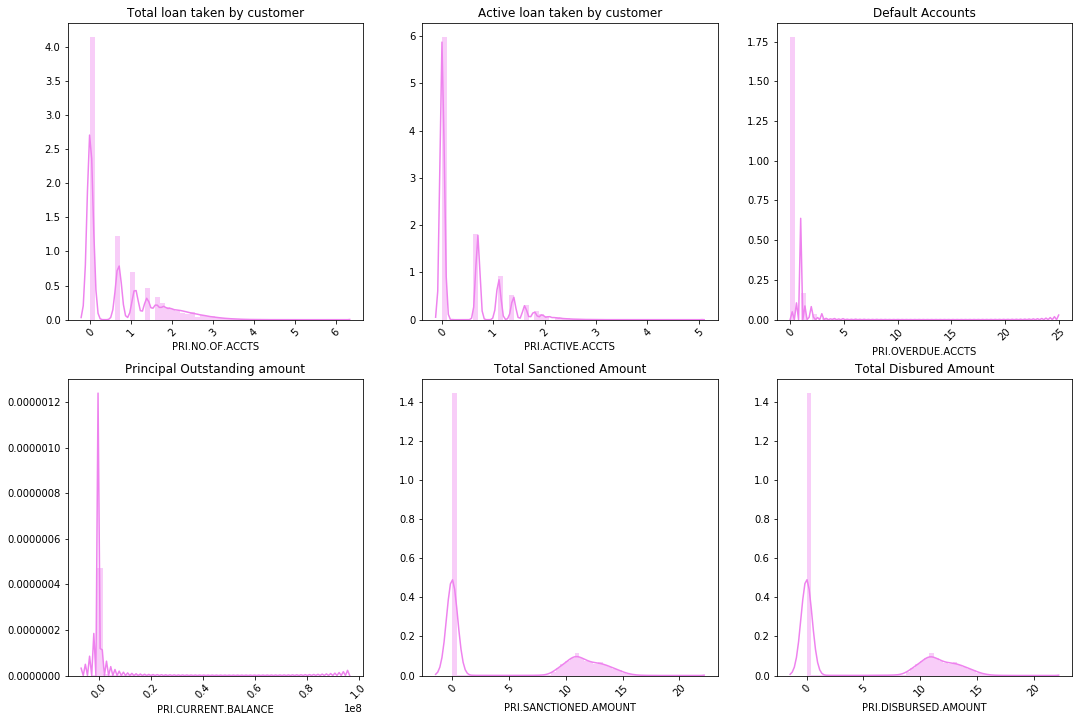

In [54]:
# plotting distribution plots for these attributes

plt.rcParams['figure.figsize'] = (18, 12)    
plt.subplot(2, 3, 1)
sns.distplot(data['PRI.NO.OF.ACCTS'], color = 'violet')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sns.distplot(data['PRI.ACTIVE.ACCTS'], color = 'violet')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sns.distplot(data['PRI.OVERDUE.ACCTS'], color = 'violet')
plt.title('Default Accounts')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 4)
sns.distplot(data['PRI.CURRENT.BALANCE'], color = 'violet')
plt.title('Principal Outstanding amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sns.distplot(data['PRI.SANCTIONED.AMOUNT'], color = 'violet')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sns.distplot(data['PRI.DISBURSED.AMOUNT'], color = 'violet')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

plt.show()

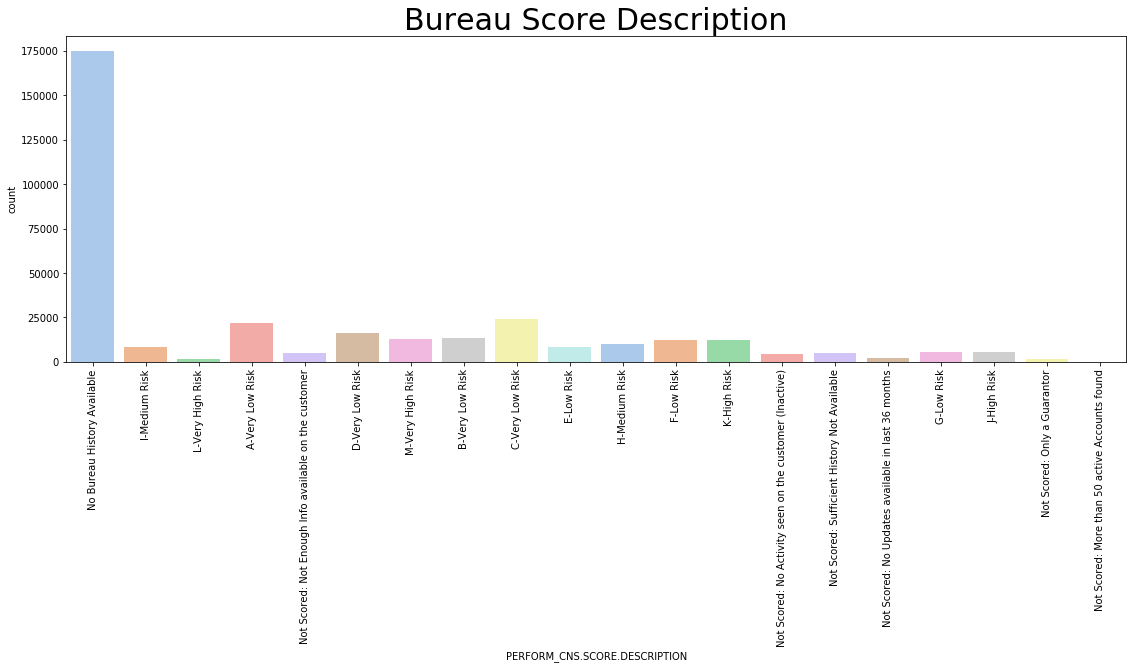

In [55]:
# checking the bureau score description

plt.rcParams['figure.figsize'] = (19, 6)
sns.countplot(data['PERFORM_CNS.SCORE.DESCRIPTION'], palette = 'pastel')
plt.title('Bureau Score Description', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

In [56]:
# checking the perform cns score description

data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                174843
C-Very Low Risk                                             23870
A-Very Low Risk                                             21683
D-Very Low Risk                                             16472
B-Very Low Risk                                             13696
M-Very High Risk                                            12808
F-Low Risk                                                  12176
K-High Risk                                                 12141
H-Medium Risk                                               10142
E-Low Risk                                                   8393
I-Medium Risk                                                8260
G-Low Risk                                                   5795
J-High Risk                                                  5526
Not Scored: Sufficient History Not Available                 5025
Not Scored: Not Enough Info available on the customer        4940
Not Scored

In [57]:
# encodings for bureau score(perform cns score distribution)

data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',0)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 1)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 1)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 2)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 2)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 3)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 4)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 4)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 4)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 5)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 5)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 5)
data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 5)

# checing the values in bureau score
data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()


0    192802
5     75721
4     26364
3     18402
2     17667
1     14590
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [58]:
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',0)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 1)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 1)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 2)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 2)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 3)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 4)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 4)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 4)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 5)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 5)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 5)
train['PERFORM_CNS.SCORE.DESCRIPTION'] = train['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 5)

In [59]:
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',0)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 1)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 1)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 2)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 2)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 3)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 4)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 4)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 4)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 5)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 5)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 5)
test['PERFORM_CNS.SCORE.DESCRIPTION'] = test['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 5)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


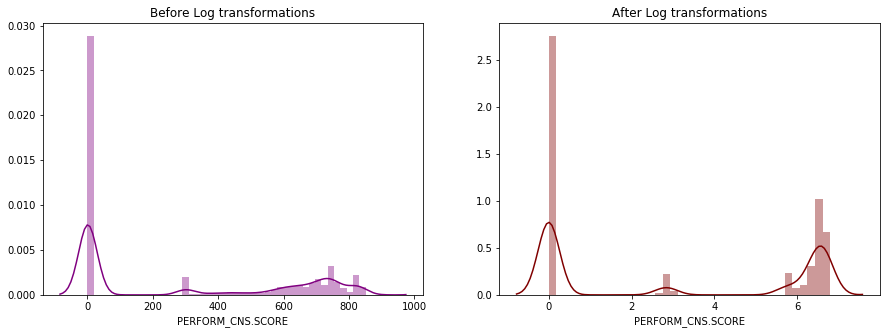

In [60]:
# checking the bureau score

plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.distplot(data['PERFORM_CNS.SCORE'], color = 'purple')
plt.title('Before Log transformations')

plt.subplot(1, 2, 2)
data['PERFORM_CNS.SCORE'] = np.log1p(data['PERFORM_CNS.SCORE'])
train['PERFORM_CNS.SCORE'] = np.log1p(train['PERFORM_CNS.SCORE'])
test['PERFORM_CNS.SCORE'] = np.log1p(test['PERFORM_CNS.SCORE'])
sns.distplot(data['PERFORM_CNS.SCORE'], color = 'maroon')
plt.title('After Log transformations')

plt.show()

In [61]:
# customer has passport or not

data['Passport_flag'].value_counts()

0    344835
1       711
Name: Passport_flag, dtype: int64

In [62]:
# customer has driving license or not

data['Driving_flag'].value_counts()

0    338249
1      7297
Name: Driving_flag, dtype: int64

In [63]:
# customer has voter-id card or not

data['VoterID_flag'].value_counts()

0    298155
1     47391
Name: VoterID_flag, dtype: int64

In [64]:
# customer has pan card or not

data['PAN_flag'].value_counts()

0    306392
1     39154
Name: PAN_flag, dtype: int64

In [65]:
# customer has aadhar card or not

data['Aadhar_flag'].value_counts()

1    293663
0     51883
Name: Aadhar_flag, dtype: int64

In [66]:
# customer has shared the mobile no. or not

data['MobileNo_Avl_Flag'].value_counts()

1    345546
Name: MobileNo_Avl_Flag, dtype: int64

In [67]:
# lets extract features from disbursal dates
# as all  the disbursement dates are of year 2018 so we can extract the months

data['DisbursalDate'] = pd.to_datetime(data['DisbursalDate'], errors = 'coerce')
train['DisbursalDate'] = pd.to_datetime(train['DisbursalDate'], errors = 'coerce')
test['DisbursalDate'] = pd.to_datetime(test['DisbursalDate'], errors = 'coerce')

# extracting the month of the disbursement
data['DisbursalMonth'] = data['DisbursalDate'].dt.month
train['DisbursalMonth'] = train['DisbursalDate'].dt.month
test['DisbursalMonth'] = test['DisbursalDate'].dt.month

add_datepart(data, 'DisbursalDate')
add_datepart(train, 'DisbursalDate')
add_datepart(test, 'DisbursalDate')
data['DisbursalMonth'].value_counts()

11    99420
10    89440
8     58586
9     57939
12    10659
3      7601
6      7024
4      4627
7      4339
5      4178
1      1708
2        25
Name: DisbursalMonth, dtype: int64

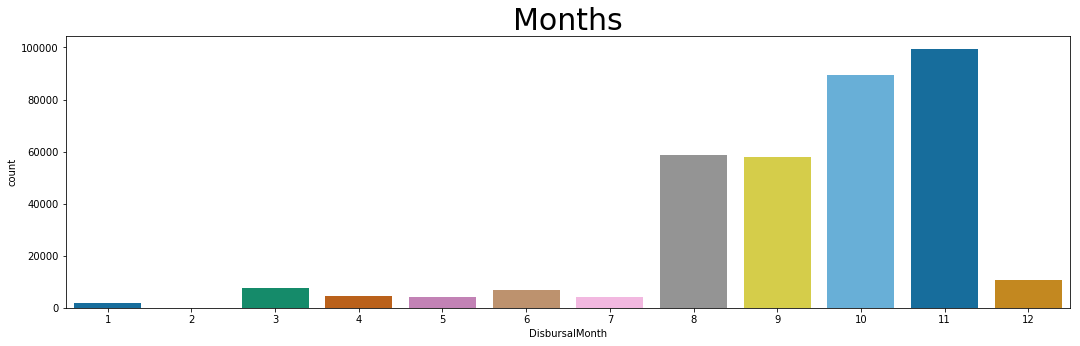

In [68]:
# plotting the Disbursal date

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(data['DisbursalMonth'], palette = 'colorblind')
plt.title('Months', fontsize = 30)
plt.show()

In [69]:
# some attributes are categorical but they are in integer so let's convert them into category

# data['branch_id'] = data['branch_id'].astype('category')
# data['manufacturer_id'] = data['manufacturer_id'].astype('category')
# data['State_ID'] = data['State_ID'].astype('category')

# train['branch_id'] = train['branch_id'].astype('category')
# train['manufacturer_id'] = train['manufacturer_id'].astype('category')
# train['State_ID'] = train['State_ID'].astype('category')

# test['branch_id'] = test['branch_id'].astype('category')
# test['manufacturer_id'] = test['manufacturer_id'].astype('category')
# test['State_ID'] = test['State_ID'].astype('category')

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# data['branch_id'] = le.fit_transform(data['branch_id'])
# data['manufacturer_id'] = le.fit_transform(data['manufacturer_id'])
# data['State_ID'] = le.fit_transform(data['State_ID'])

# train['branch_id'] = le.fit_transform(train['branch_id'])
# train['manufacturer_id'] = le.fit_transform(train['manufacturer_id'])
# train['State_ID'] = le.fit_transform(train['State_ID'])

# test['branch_id'] = le.fit_transform(test['branch_id'])
# test['manufacturer_id'] = le.fit_transform(test['manufacturer_id'])
# test['State_ID'] = le.fit_transform(test['State_ID'])
# checking the values in these attributes
#data['branch_id'].value_counts()
#data['manufacturer_id'].value_counts()
#data['State_ID'].value_counts()

In [70]:
# removing unnecassary columns

data = data.drop(['Date.of.Birth','UniqueID'], axis = 1)
train = train.drop(['Date.of.Birth', 'UniqueID'], axis = 1)
test = test.drop(['Date.of.Birth', 'UniqueID'], axis = 1)

# checking the new columns of data
data.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'Employment.Type', 'State_ID',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'Year_of_birth', 'age', 'DisbursalMonth', 'DisbursalYear',
       'DisbursalWeek', 'DisbursalDay', 'DisbursalDayofweek',
       'DisbursalDayofyear', 'DisbursalIs_mo

In [71]:
# looking at the sample of the pre-processed data

data.sample(5)

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Year_of_birth,age,DisbursalMonth,DisbursalYear,DisbursalWeek,DisbursalDay,DisbursalDayofweek,DisbursalDayofyear,DisbursalIs_month_end,DisbursalIs_month_start,DisbursalIs_quarter_end,DisbursalIs_quarter_start,DisbursalIs_year_end,DisbursalIs_year_start,DisbursalElapsed
201256,10.855223,11.178110,4.327834,11,23225,51,5993,2,3,2807,1,1,0,0,0,0,0.000000,0,0.000000,0.000000,0,0,0.000000,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.0,0,0,0,0,0,1975,43.0,8,2018,34,21,1,233,False,False,False,False,False,False,1534809600
265123,10.765322,11.139192,4.279579,162,14545,86,1883,1,4,1743,1,1,1,0,0,0,0.000000,0,0.000000,0.000000,0,0,0.000000,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.0,0,0,0,0,0,1970,49.0,11,2018,46,14,2,318,False,False,False,False,False,False,1542153600
54016,10.790226,11.118919,4.358118,5,18130,86,3318,2,9,632,1,1,0,0,0,0,2.890372,0,0.693147,0.693147,0,8163,9.546741,9.546741,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.0,1,0,2,2,0,1980,38.0,10,2018,44,31,2,304,True,False,False,False,False,False,1540944000
281560,10.846011,11.138348,4.357734,74,22229,45,2578,2,4,1467,1,1,0,0,0,0,0.000000,0,0.000000,0.000000,0,0,0.000000,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.0,0,0,0,0,0,1984,34.0,11,2018,46,13,1,317,False,False,False,False,False,False,1542067200
91144,11.150865,11.274554,4.505129,5,14293,86,3386,2,9,1240,1,1,0,0,0,0,6.605298,5,0.693147,0.693147,0,28412,10.747229,10.747229,0.0,0.0,0.0,0,0.0,0.0,7.857481,0.0,1,0,3,3,0,1976,42.0,9,2018,37,14,4,257,False,False,False,False,False,False,1536883200


In [72]:
# checking the target variable

y.value_counts(normalize=True)

0    0.782929
1    0.217071
Name: loan_default, dtype: float64

In [73]:
# there is a big difference in the no. of values for 1 and 0
# so we can apply SMOTE or over-sampling
# that means replicating the samples of 1 to lessen the parity between 0 and 1 values

# lets install imblearn
#!pip install -U imbalanced-learn

In [74]:
# separating train and test datasets from data

x_train = train
x_test = test
y.shape
# checking the shape of train and test
print("Shape of train :", x_train.shape)
print("Shape of test :", x_test.shape)

Shape of train : (233154, 52)
Shape of test : (112392, 52)


In [75]:
# applying SMOTE

# from imblearn.over_sampling import SMOTE

# x_resample, y_resample = SMOTE().fit_sample(x_train, y_train.values.ravel()) 

# # checking the shape of x_resample and y_resample
# print("Shape of x:", x_resample.shape)
# print("Shape of y:", y_resample.shape)

In [76]:

# train and valid sets from train
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train, y, test_size = 0.2, random_state = 0)

# checking the shapes
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(186523, 52)
(186523,)
(46631, 52)
(46631,)


In [ ]:
# applying standardization

# standardization

from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_valid = sc.transform(x_valid)
# x_test = sc.transform(x_test)

In [77]:
# RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

# model_rf = RandomForestClassifier(n_estimators =150,n_jobs=-1,random_state=1)
# model_rf.fit(x_train, y_train)

# y_pred = model_rf.predict(x_valid)

# print("Training Accuracy: ", model_rf.score(x_train, y_train))
# print('Testing Accuarcy: ', model_rf.score(x_valid, y_valid))
# print('Traing AUC:',roc_auc_score(y_train,model_rf.predict_proba(x_train)[:,1]))
# print('Testing AUC:',roc_auc_score(y_valid,model_rf.predict_proba(x_valid)[:,1]))

# # making a classification report
# cr = classification_report(y_valid,  y_pred)
# print(cr)

# # making a confusion matrix
# cm = confusion_matrix(y_valid, y_pred)
# sns.heatmap(cm, annot = True)

In [78]:
# # getting the avg precision score
# from sklearn.metrics import average_precision_score

# apc = average_precision_score(y_valid, y_pred)
# print('Average Precision Score :', apc)

In [79]:
##### plotting an AUC ROC Curve

# from sklearn.metrics import precision_recall_curve
# from sklearn.utils.fixes import signature

# precision, recall, _ = precision_recall_curve(y_valid, y_pred)

# step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

# plt.step(recall, precision, color = 'red', alpha = 0.6, where = 'post')
# plt.fill_between(recall, precision, color = 'red', alpha = 0.6, **step_kwargs)

# plt.title('Precision Recall Curve')
# plt.xlabel('Recall', fontsize = 15)
# plt.ylabel('Precision', fontsize =15)
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])

In [80]:
# ADA BOOST CLASSIFIER

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# model_ada = AdaBoostClassifier(learning_rate=1.2,n_estimators=100)
# model_ada.fit(x_train, y_train)

# y_pred = model_ada.predict(x_valid)

# print("Training Accuracy: ", model_ada.score(x_train, y_train))
# print('Testing Accuarcy: ', model_ada.score(x_valid, y_valid))
# print('Traing AUC:',roc_auc_score(y_train,model_ada.predict_proba(x_train)[:,1]))
# print('Testing AUC:',roc_auc_score(y_valid,model_ada.predict_proba(x_valid)[:,1]))

# # making a classification report
# cr = classification_report(y_valid,  y_pred)
# print(cr)

# # making a confusion matrix
# cm = confusion_matrix(y_valid, y_pred)
# sns.heatmap(cm, annot = True)

In [81]:
# # getting the avg precision score
from sklearn.metrics import average_precision_score

# apc = average_precision_score(y_valid, y_pred)
# print('Average Precision Score :', apc)

In [82]:
# plotting an AUC ROC Curve

from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

# precision, recall, _ = precision_recall_curve(y_valid, y_pred)

# step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

# plt.step(recall, precision, color = 'pink', alpha = 0.6, where = 'post')
# plt.fill_between(recall, precision, color = 'pink', alpha = 0.6, **step_kwargs)

# plt.title('Precision Recall Curve')
# plt.xlabel('Recall', fontsize = 15)
# plt.ylabel('Precision', fontsize =15)
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])

In [83]:
# Xg-Boost Classifier

from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# model_xgb = XGBClassifier(n_estimators = 200, n_jobs = -1,learning_rate = 0.25,eval_metric='merror',reg_alpha=0.1)
# model_xgb.fit(x_train, y_train)

# y_pred = model_xgb.predict(x_valid)

# print("Training Accuracy: ", model_xgb.score(x_train, y_train))
# print('Testing Accuarcy: ', model_xgb.score(x_valid, y_valid))
# print('Traing AUC:',roc_auc_score(y_train,model_xgb.predict_proba(x_train)[:,1]))
# print('Testing AUC:',roc_auc_score(y_valid,model_xgb.predict_proba(x_valid)[:,1]))
# # making a classification report
# cr = classification_report(y_valid,  y_pred)
# print(cr)

# # making a confusion matrix
# cm = confusion_matrix(y_valid, y_pred)
# sns.heatmap(cm, annot = True)

In [84]:
# # getting the avg precision score
# from sklearn.metrics import average_precision_score

# apc = average_precision_score(y_valid, y_pred)
# print('Average Precision Score :', apc)

In [85]:
# # plotting an AUC ROC Curve

# from sklearn.metrics import precision_recall_curve
# from sklearn.utils.fixes import signature

# precision, recall, _ = precision_recall_curve(y_valid, y_pred)

# step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

# plt.step(recall, precision, color = 'pink', alpha = 0.6, where = 'post')
# plt.fill_between(recall, precision, color = 'pink', alpha = 0.6, **step_kwargs)

# plt.title('Precision Recall Curve')
# plt.xlabel('Recall', fontsize = 15)
# plt.ylabel('Precision', fontsize =15)
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])

In [86]:
# light boost classifier

from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# model_lgb = LGBMClassifier(random_state=1,learning_rate=0.15,n_estimators=400,min_child_samples=25,n_jobs=-1,reg_alpha=0.1,reg_lambda=0.1)
# model_lgb.fit(x_train, y_train)

# y_pred = model_lgb.predict(x_valid)

# print("Training Accuracy: ", model_lgb.score(x_train, y_train))
# print('Testing Accuarcy: ', model_lgb.score(x_valid, y_valid))
# print('Traing AUC:',roc_auc_score(y_train,model_lgb.predict_proba(x_train)[:,1]))
# print('Testing AUC:',roc_auc_score(y_valid,model_lgb.predict_proba(x_valid)[:,1]))

# # making a classification report
# cr = classification_report(y_valid,  y_pred)
# print(cr)

# # making a confusion matrix
# cm = confusion_matrix(y_valid, y_pred)
# sns.heatmap(cm, annot = True)

In [87]:
# # getting the avg precision score
from sklearn.metrics import average_precision_score

# apc = average_precision_score(y_valid, y_pred)
# print('Average Precision Score :', apc)

In [88]:
# # plotting an AUC ROC Curve

from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

# precision, recall, _ = precision_recall_curve(y_valid, y_pred)

# step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

# plt.step(recall, precision, color = 'pink', alpha = 0.6, where = 'post')
# plt.fill_between(recall, precision, color = 'pink', alpha = 0.6, **step_kwargs)

# plt.title('Precision Recall Curve')
# plt.xlabel('Recall', fontsize = 15)
# plt.ylabel('Precision', fontsize =15)
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])

In [89]:
# GBM  classifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# model_gbm = GradientBoostingClassifier(random_state=1,loss='exponential',learning_rate=0.26,n_estimators=150,max_depth =5,min_samples_leaf=1)
# model_gbm.fit(x_train, y_train)

# y_pred = model_gbm.predict(x_valid)

# print("Training Accuracy: ", model_gbm.score(x_train, y_train))
# print('Testing Accuarcy: ', model_gbm.score(x_valid, y_valid))
# print('Traing AUC:',roc_auc_score(y_train,model_gbm.predict_proba(x_train)[:,1]))
# print('Testing AUC:',roc_auc_score(y_valid,model_gbm.predict_proba(x_valid)[:,1]))

# # making a classification report
# cr = classification_report(y_valid,  y_pred)
# print(cr)

# # making a confusion matrix
# cm = confusion_matrix(y_valid, y_pred)
# sns.heatmap(cm, annot = True)

In [90]:
# getting the avg precision score
from sklearn.metrics import average_precision_score

# apc = average_precision_score(y_valid, y_pred)
# print('Average Precision Score :', apc)

In [91]:
# plotting an AUC ROC Curve

from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

# precision, recall, _ = precision_recall_curve(y_valid, y_pred)

# step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

# plt.step(recall, precision, color = 'pink', alpha = 0.6, where = 'post')
# plt.fill_between(recall, precision, color = 'pink', alpha = 0.6, **step_kwargs)

# plt.title('Precision Recall Curve')
# plt.xlabel('Recall', fontsize = 15)
# plt.ylabel('Precision', fontsize =15)
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])

In [92]:
# let's plot the feature importance plot for the lg boost model
# feature = pd.DataFrame()
# x_train = pd.DataFrame(x_train)
# feature['name'] = x_train.columns
# feature['importance'] = model_lgb.feature_importances_

# feature.sort_values(by = ['importance'], ascending = True, inplace = True)
# feature.set_index('name', inplace = True)

# feature.plot(kind = 'barh', color = 'purple', figsize = (5, 15), fontsize = 10)

In [93]:
# ## fit all the models on whole training set (No validation set needed) before predicting on testing set

# model_rf.fit(train, y)
# model_ada.fit(train, y)
# model_xgb.fit(train, y)
# model_lgb.fit(train, y)
# model_gbm.fit(train, y)

In [94]:
# # let's predict for the tests set
# y_pred_rf = model_rf.predict_proba(x_test)[:,1]
# y_pred_ada = model_ada.predict_proba(x_test)[:,1]
# y_pred_xgb = model_xgb.predict_proba(x_test)[:,1]
# y_pred_lgb = model_lgb.predict_proba(x_test)[:,1]
# y_pred_gbm = model_lgb.predict_proba(x_test)[:,1]

In [95]:
# ##Boosting.
## XGB, LGB, GBM performed better than RF and ADA on validation set. let's give more weiht to them
#avg_pred = y_pred_ada
# avg_pred = y_pred_rf*0.17 + y_pred_ada*0.20 + y_pred_lgb*0.21 + y_pred_xgb*0.21 + y_pred_gbm*0.21

In [96]:
# lets look at the submission file
submission = pd.read_csv('../input/sample_submission_24jSKY6.csv')
submission.head()

,UniqueID,loan_default
0,655269,0
1,723482,0
2,758529,0
3,763449,0
4,708663,0


In [97]:
#  let's create a submission file
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
# submission_avg = pd.DataFrame({'UniqueID': unique_id,'loan_default': avg_pred})
# submission_avg.to_csv('submission_avg.csv',index=False)
# #Visualize the first 5 rows
# submission_avg.head()

In [98]:
# submission_rf = pd.DataFrame({'UniqueID': unique_id,'loan_default': y_pred_rf})
# submission_rf.to_csv('submission_rf.csv',index=False)
# #Visualize the first 5 rows
# submission_rf.head()

In [99]:
# submission_ada = pd.DataFrame({'UniqueID': unique_id,'loan_default': y_pred_ada})
# submission_ada.to_csv('submission_ada.csv',index=False)
# #Visualize the first 5 rows
# submission_ada.head()

In [100]:
# submission_xgb = pd.DataFrame({'UniqueID': unique_id,'loan_default': y_pred_xgb})
# submission_xgb.to_csv('submission_xgb.csv',index=False)
# #Visualize the first 5 rows
# submission_xgb.head()

In [101]:
# submission_lgb = pd.DataFrame({'UniqueID': unique_id,'loan_default': y_pred_lgb})
# submission_lgb.to_csv('submission_lgb.csv',index=False)
# #Visualize the first 5 rows
# submission_lgb.head()

In [ ]:
# submission_gbm = pd.DataFrame({'UniqueID': unique_id,'loan_default': y_pred_gbm})
# submission_gbm.to_csv('submission_gbm.csv',index=False)
# #Visualize the first 5 rows
# submission_gbm.head()

In [ ]:
from IPython.display import HTML
def create_download_link(title = "Download CSV file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
#filename = 'submission.csv'
# submission.to_csv(filename,index=False)

# print('Saved file: ' + filename)
# create_download_link(filename='submission1.csv')

In [ ]:
display_all(train.head())

In [102]:
def k_folds_xgb(X, y, X_test, k,n_est):
    folds = StratifiedKFold(n_splits = k, shuffle=True, random_state=2019)
    y_test = np.zeros((X_test.shape[0], 2))
    y_oof = np.zeros((X.shape[0]))
    score = 0
    for i, (train_idx, val_idx) in  enumerate(folds.split(X, y)):
        clf =  XGBClassifier(n_estimators = n_est, n_jobs = -1,learning_rate = 0.25,eval_metric='merror',reg_alpha=0.1)
        clf.fit(X.iloc[train_idx], y[train_idx])
        y_oof[val_idx] = clf.predict(X.iloc[val_idx])
        y_test += clf.predict_proba(X_test) / folds.n_splits
        score += roc_auc_score(y[val_idx],clf.predict_proba(X.iloc[val_idx])[:,1])
        print('Fold: {} score: {}'.format(i,roc_auc_score(y[val_idx],clf.predict_proba(X.iloc[val_idx])[:,1])))
    print('Avg ROC', score / folds.n_splits) 
        
    return y_oof, y_test 

In [103]:
y_oof, y_pred_kxgb = k_folds_xgb(train, y, x_test, k= 20,n_est=200)

Fold: 0 score: 0.6632656462148067
Fold: 1 score: 0.6613979857479783
Fold: 2 score: 0.6609948340836554
Fold: 3 score: 0.6741112300169907
Fold: 4 score: 0.6720557061323125
Fold: 5 score: 0.680801298261154
Fold: 6 score: 0.6630986244978828
Fold: 7 score: 0.674815502408028
Fold: 8 score: 0.6730707951542215
Fold: 9 score: 0.6661949079145125
Fold: 10 score: 0.6742323532667369
Fold: 11 score: 0.6707369785430103
Fold: 12 score: 0.6587251221346906
Fold: 13 score: 0.666541179344091
Fold: 14 score: 0.6713159192787242
Fold: 15 score: 0.6725477030103532
Fold: 16 score: 0.6626591128870557
Fold: 17 score: 0.6715957864668569
Fold: 18 score: 0.6782538539389926
Fold: 19 score: 0.6705742333371297
Avg ROC 0.6693494386319591


In [ ]:
submission_kxgb = pd.DataFrame({'UniqueID': unique_id,'loan_default': y_pred_kxgb[:,1]})
submission_kxgb.to_csv('submission_kxgb.csv',index=False)
#Visualize the first 5 rows
submission_kxgb.head()

In [ ]:
def k_folds_gbm(X, y, X_test, k,n_est):
    folds = StratifiedKFold(n_splits = k, shuffle=True, random_state=2019)
    y_test = np.zeros((X_test.shape[0], 2))
    y_oof = np.zeros((X.shape[0]))
    score = 0
    for i, (train_idx, val_idx) in  enumerate(folds.split(X, y)):
        clf =  GradientBoostingClassifier(random_state=1,loss='exponential',learning_rate=0.26,n_estimators=n_est,max_depth =5,min_samples_leaf=1)
        clf.fit(X.iloc[train_idx], y[train_idx])
        y_oof[val_idx] = clf.predict(X.iloc[val_idx])
        y_test += clf.predict_proba(X_test) / folds.n_splits
        score += roc_auc_score(y[val_idx],clf.predict_proba(X.iloc[val_idx])[:,1])
        print('Fold: {} score: {}'.format(i,roc_auc_score(y[val_idx],clf.predict_proba(X.iloc[val_idx])[:,1])))
    print('Avg ROC', score / folds.n_splits) 
        
    return y_oof, y_test 

In [ ]:
y_oof, y_pred_kgbm = k_folds_gbm(train, y, x_test, k= 20,n_est=200)

In [ ]:
submission_kgbm = pd.DataFrame({'UniqueID': unique_id,'loan_default': y_pred_kgbm[:,1]})
submission_kgbm.to_csv('submission_kgbm.csv',index=False)
#Visualize the first 5 rows
submission_kgbm.head()

In [ ]:
def k_folds_ada(X, y, X_test, k,n_est):
    folds = StratifiedKFold(n_splits = k, shuffle=True, random_state=2019)
    y_test = np.zeros((X_test.shape[0], 2))
    y_oof = np.zeros((X.shape[0]))
    score = 0
    for i, (train_idx, val_idx) in  enumerate(folds.split(X, y)):
        clf =  AdaBoostClassifier(learning_rate=1.2,n_estimators=n_est)
        clf.fit(X.iloc[train_idx], y[train_idx])
        y_oof[val_idx] = clf.predict(X.iloc[val_idx])
        y_test += clf.predict_proba(X_test) / folds.n_splits
        score += roc_auc_score(y[val_idx],clf.predict_proba(X.iloc[val_idx])[:,1])
        print('Fold: {} score: {}'.format(i,roc_auc_score(y[val_idx],clf.predict_proba(X.iloc[val_idx])[:,1])))
    print('Avg ROC', score / folds.n_splits) 
        
    return y_oof, y_test 

In [ ]:
y_oof, y_pred_kada = k_folds_ada(train, y, x_test, k= 20,n_est=200)

In [ ]:
submission_kada = pd.DataFrame({'UniqueID': unique_id,'loan_default': y_pred_kada[:,1]})
submission_kada.to_csv('submission_kada.csv',index=False)
#Visualize the first 5 rows
submission_kada.head()

In [ ]:
# def k_folds_rf(X, y, X_test, k,n_est):
#     folds = StratifiedKFold(n_splits = k, shuffle=True, random_state=2019)
#     y_test = np.zeros((X_test.shape[0], 2))
#     y_oof = np.zeros((X.shape[0]))
#     score = 0
#     for i, (train_idx, val_idx) in  enumerate(folds.split(X, y)):
#         clf =  RandomForestClassifier(n_estimators =n_est,n_jobs=-1,random_state=1)
#         clf.fit(X.iloc[train_idx], y[train_idx])
#         y_oof[val_idx] = clf.predict(X.iloc[val_idx])
#         y_test += clf.predict_proba(X_test) / folds.n_splits
#         score += roc_auc_score(y[val_idx],clf.predict_proba(X.iloc[val_idx])[:,1])
#         print('Fold: {} score: {}'.format(i,roc_auc_score(y[val_idx],clf.predict_proba(X.iloc[val_idx])[:,1])))
#     print('Avg ROC', score / folds.n_splits) 
        
#     return y_oof, y_test 

In [ ]:
# y_oof, y_pred_krf = k_folds_rf(train, y, x_test, k= 20,n_est=250)

In [ ]:
# submission_krf = pd.DataFrame({'UniqueID': unique_id,'loan_default': y_pred_krf[:,1]})
# submission_krf.to_csv('submission_krf.csv',index=False)
# #Visualize the first 5 rows
# submission_krf.head()

In [ ]:
def k_folds_lgb(X, y, X_test, k,n_est):
    folds = StratifiedKFold(n_splits = k, shuffle=True, random_state=2019)
    y_test = np.zeros((X_test.shape[0], 2))
    y_oof = np.zeros((X.shape[0]))
    score = 0
    for i, (train_idx, val_idx) in  enumerate(folds.split(X, y)):
        clf =  LGBMClassifier(random_state=1,learning_rate=0.15,n_estimators=n_est,min_child_samples=25,n_jobs=-1,reg_alpha=0.1,reg_lambda=0.1)
        clf.fit(X.iloc[train_idx], y[train_idx])
        y_oof[val_idx] = clf.predict(X.iloc[val_idx])
        y_test += clf.predict_proba(X_test) / folds.n_splits
        score += roc_auc_score(y[val_idx],clf.predict_proba(X.iloc[val_idx])[:,1])
        print('Fold: {} score: {}'.format(i,roc_auc_score(y[val_idx],clf.predict_proba(X.iloc[val_idx])[:,1])))
    print('Avg ROC', score / folds.n_splits) 
        
    return y_oof, y_test 

In [ ]:
y_oof, y_pred_klgb = k_folds_lgb(train, y, x_test, k= 20,n_est=500)

In [ ]:
submission_klgb = pd.DataFrame({'UniqueID': unique_id,'loan_default': y_pred_klgb[:,1]})
submission_klgb.to_csv('submission_klgb.csv',index=False)
#Visualize the first 5 rows
submission_klgb.head()

In [ ]:
# avg_pred2 = y_pred_krf*0.17 + y_pred_kada*0.20 + y_pred_kxgb*0.21 + y_pred_klgb*0.21 + y_pred_kgbm*0.21
avg_pred =  (y_pred_kxgb + y_pred_klgb + y_pred_kgbm + y_pred_kada)/4
submission_avg = pd.DataFrame({'UniqueID': unique_id,'loan_default': avg_pred[:,1]})
submission_avg.to_csv('submission_avg.csv',index=False)
#Visualize the first 5 rows
submission_avg.head()

In [ ]:
display_all(train.head())

In [ ]:
display_all(test.head())

In [ ]:
train['loan_default'] = y
train.shape, test.shape, y.shape

In [ ]:
dep_var = 'loan_default'
cat_vars = ['branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Employment.Type', 'State_ID', 'Employee_code_ID',
           'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
           'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','NO.OF_INQUIRIES','Year_of_birth','DisbursalMonth','DisbursalYear','DisbursalWeek',
           'DisbursalDay','DisbursalDayofweek','DisbursalDayofyear','DisbursalIs_month_end','DisbursalIs_month_start',
           'DisbursalIs_quarter_end','DisbursalIs_quarter_start','DisbursalIs_year_end','DisbursalIs_year_start']
cont_vars = ['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','PERFORM_CNS.SCORE.DESCRIPTION','PRI.NO.OF.ACCTS','PRI.ACTIVE.ACCTS',
             'PRI.OVERDUE.ACCTS','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS',
             'SEC.OVERDUE.ACCTS','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.INSTAL.AMT',
             'AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH','DisbursalElapsed']
procs = [Categorify]

In [ ]:
data = (TabularList.from_df(train, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(list(range(55000,100000)))
                .label_from_df(cols=dep_var)
                .add_test(TabularList.from_df(test, path=path, cat_names=cat_vars, cont_names=cont_vars))
                .databunch())

In [ ]:
data.show_batch(rows=5)

In [ ]:
learn = tabular_learner(data, layers=[500,100], ps=[0.001,0.01], emb_drop=0.04, 
                         metrics=accuracy)

In [ ]:
learn.model

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(3, 1e-2, wd=0.15)

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.fit_one_cycle(1, 3e-4)

In [ ]:
#learn.TTA(DatasetType.Test)

In [ ]:
test_preds = learn.get_preds(DatasetType.Test)[0][:,1]
submit = pd.DataFrame({'UniqueID':unique_id, 'loan_default':test_preds}, columns=['UniqueID', 'loan_default'])
submit.to_csv('submit_1.csv',index=False)
submit.head()

In [ ]:
#create_download_link(filename='submit.csv')